In [21]:
def CorrPlot(scoreA, scoreB, topN=10, isDrop=True, fullRank=True):
    """CorrPlot showing the correlation between two scoring method to one dataframe

    :param scoreA: dataA input as score of some criteria
    :type scoreA: numpy.array
    :param scoreB: dataB input as score of some criteria, could be drop(see isDrop)
    :type scoreB: numpy.ndarray
    :param topN: Number of top items of each input data to be count in the plot, defaults to 10
    :type topN: int, optional
    :param isDrop: indeicating the scoreB a score of drop of not, defaults to True, \
        if it is drop then the data would be processed by 1-socreB
    :type isDrop: bool, optional
    :param fullRank: show the full range of each group's top items or not, defaults to True
    :type fullRank: bool, optional
    :return: None
    :rtype: None
    """    
    import matplotlib.pyplot as plt
    import numpy as np
    num = topN
    # Data preprocessing
    #- Validation -#
    assert len(scoreA) == len(scoreB),\
         "Data input should have same dimension"
    #- Normalization -#
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    
    x = np.arange(len(scoreA))
    y = normalization(scoreA)
    z = normalization(scoreB)
    
    # Adding a fixed dimension which length is same as above inputs
    fix_value = []
    # Calculate data y and data z's maximum, take 1/4 of it as the fixed width of bar
    value_max = max(max(y), max(z))
    fix_temp = value_max / 4
    for i in range(len(x)):
        fix_value.append(fix_temp)
    # Trun z into negativa value (here if z is adrop, would calculate it by subtracting from 1)
    if isDrop:
        z_ne = [zs - 1 for zs in z]
    else:
        z_ne = [-zs for zs in z]

    # Set text front size to be 12
    plt.rcParams['font.size'] = 12
    # Set figsize to make layout better
    plt.figure(figsize=(15, 8))
    # Draw the bars, set the color and bar width, plot fix_value, y, and z_ne into the frame
    plt.bar(x, fix_value, color='w', width=0.5)
    plt.bar(x, y, bottom=fix_value, color='#037171', label='RelevanceScore(%)', width=0.5)
    plt.bar(x, z_ne, color='#FF474A', width=0.5, label='AccuracyDrop(%)')
    
    # Adding data label, plot the x axis of common top items for both group

    # Process the data to find common tops
    top_y = np.argsort(y)[-num:] # Top 15 Relevance Score, reverse to find the tops
    top_z = np.argsort(z)[:num] # Top 15 Accuracy Drop, negative since measuring the drop
    # Find the common terms
    top_com = []
    for index in top_y:
        if index in top_z:
            top_com.append(index)
    
    # Plot those tops
    for a, b in zip(top_com, fix_value):
        plt.text(a, b/2, '%s' % str(a), ha='center', va='center', fontsize=12)
    for a, b in zip(top_com, top_com):
        plt.text(a, y[b] + fix_temp + value_max / 20, "{:.2f}".format(scoreA[b]*100), ha='center', va='center')
    for a, b in zip(top_com, top_com):
        plt.text(a, z_ne[b] - value_max / 20, "{:.2f}".format((scoreB*100)[b]), ha='center', va='center')
    if fullRank:
        for index in top_y:
            if index not in top_com:
                plt.text(index, y[index] + fix_temp + value_max / 20, "{:.2f}".format(scoreA[index]*100),\
                        ha='center', va='center', color='grey')
        for index in top_z:
            if index not in top_com:
                plt.text(index, (z-1)[index] - value_max / 20, "{:.2f}".format((scoreB*100)[index]),\
                        ha='center', va='center', color='grey')
    # Hide the y_ticks of plot (Since the data is normalized and reversed)
    plt.yticks([])
    # Add legend, set the position manually
    plt.legend(bbox_to_anchor=(-0.02, 0.5), frameon=False)
    # Add title and bold the title
    plt.title(label='RelevanceScore vs. AccuracyDrop', fontsize=14, fontweight='bold')
    # Set the frame of plotting area invisible
    ax = plt.gca()
    ax.set_axisbelow(True)
    [ax.spines[loc_axis].set_visible(False) for loc_axis in ['bottom', 'top', 'right', 'left']]
    # Show the plot
    plt.show()



In [7]:
test_z = [1,2,3]

In [8]:
z_ne = [zs - 1 for zs in test_z]
print(z_ne)

[0, 1, 2]


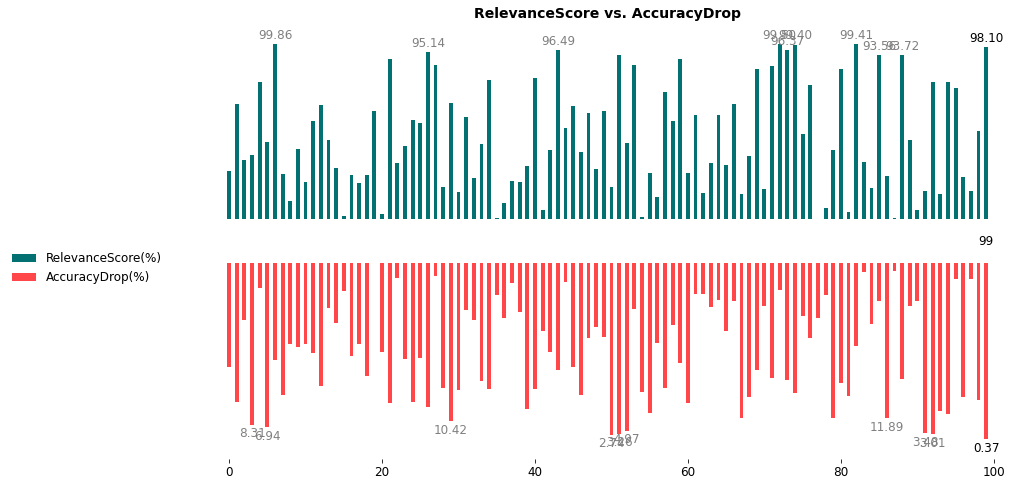

In [23]:
import numpy as np
dataA = np.random.rand(100)
dataB = np.random.rand(100)

CorrPlot(dataA, dataB, topN=10, isDrop=True, fullRank=True)